In [3]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
# from keras.models import Sequential
# from keras.layers import Dense

# from ydata_profiling import ProfileReport

In [7]:
# CARREGAMENTO DO ARQUIVO CSV
file_url = "db.csv"
data = pd.read_csv(file_url)

In [8]:
# print(data.head())

In [9]:
# PROCURANDO POR VALORES NULOS
print(data.isnull().sum())

t0         0
t1         0
t2         0
t3         0
t4         0
          ..
t196       0
t197       0
t198       0
t199       0
Classes    0
Length: 201, dtype: int64


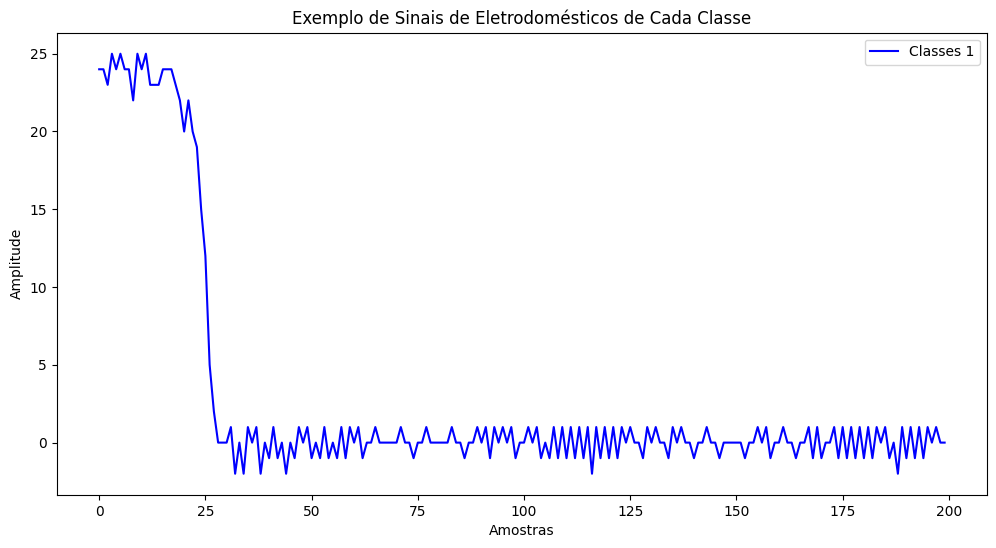

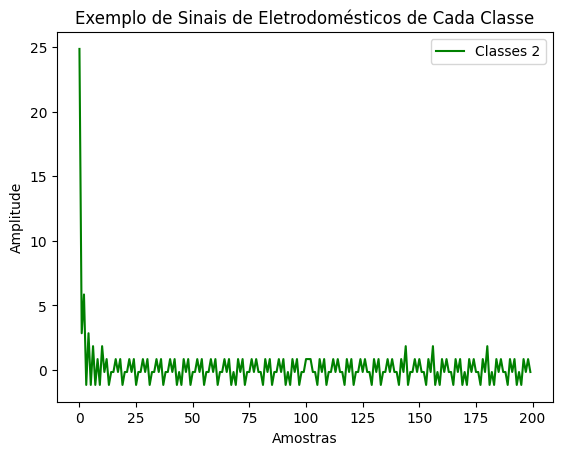

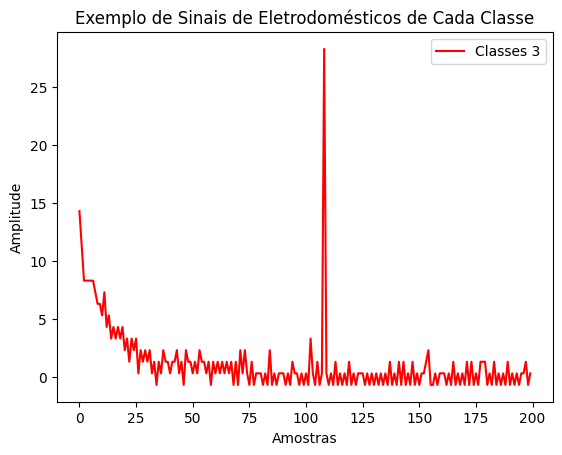

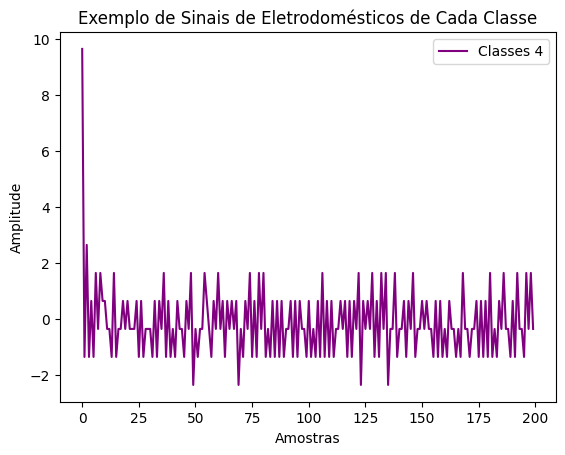

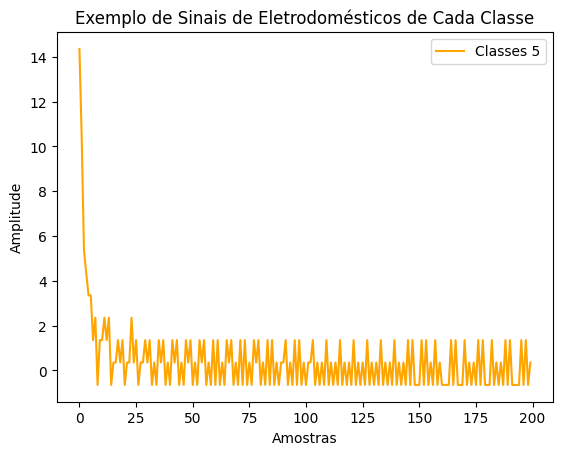

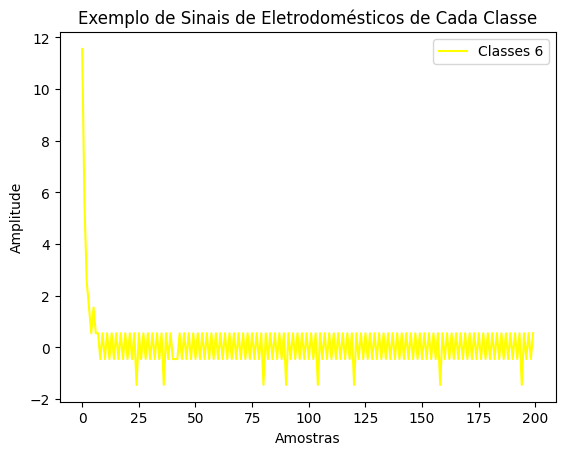

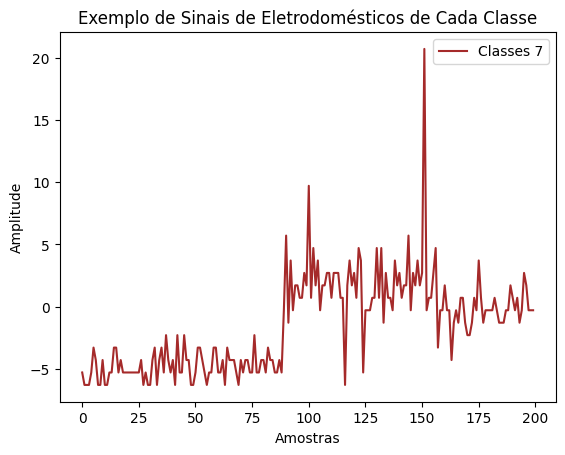

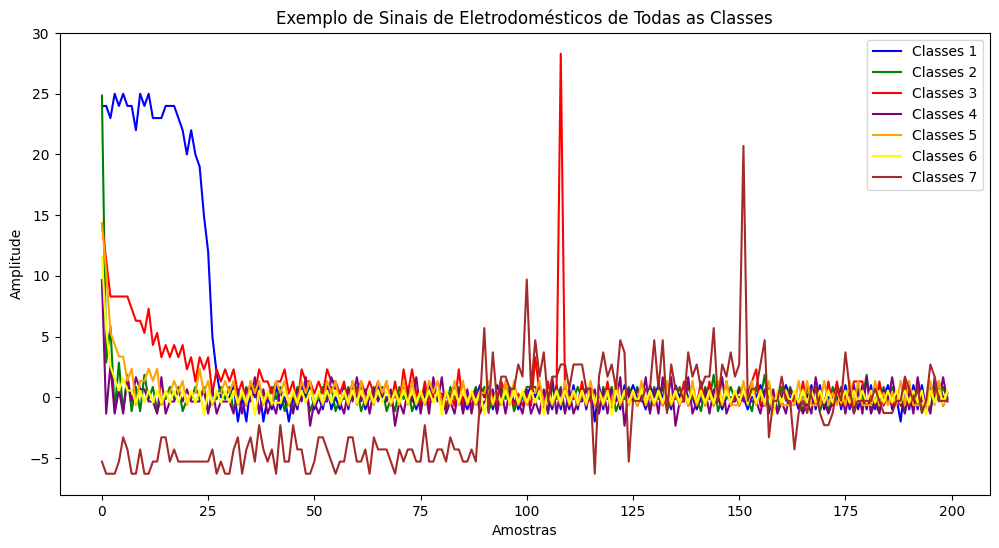

In [10]:
# Definindo uma lista de cores
colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'brown']

# EXIBINDO EXEMPLOS DE CADA CLASSE
classes = data['Classes'].unique()

plt.figure(figsize=(12, 6))

for idx, cls in enumerate(classes):
    example = data[data['Classes'] == cls].iloc[0]
    signal = example.drop(['Classes']).values
    plt.plot(signal, label=f'Classes {cls}', color=colors[idx])

    plt.title('Exemplo de Sinais de Eletrodomésticos de Cada Classe')
    plt.xlabel('Amostras')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

# EXIBINDO EXEMPLOS DE CADA CLASSE
classes = data['Classes'].unique()

plt.figure(figsize=(12, 6))

for idx, cls in enumerate(classes):
    example = data[data['Classes'] == cls].iloc[0]
    signal = example.drop(['Classes']).values
    plt.plot(signal, label=f'Classes {cls}', color=colors[idx])

plt.title('Exemplo de Sinais de Eletrodomésticos de Todas as Classes')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [11]:
# 3) Transformar os labels para uma representação correta
label_encoder = LabelEncoder()
data['Classes'] = label_encoder.fit_transform(data['Classes'])

In [12]:
# 4) Preparar os dados para serem apresentados à ML
X = data.drop('Classes', axis=1)
y = data['Classes']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# 5) Construir a rede neural com seus respectivos parâmetros
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Treinar o modelo
history = model.fit(X_train_scaled, y_train, epochs=30, batch_size=32, validation_split=0.1)

NameError: name 'Sequential' is not defined

1/1 [==============================] - 0s 59ms/step - loss: 0.2277 - accuracy: 1.0000
Test Loss: 0.22766491770744324, Test Accuracy: 1.0


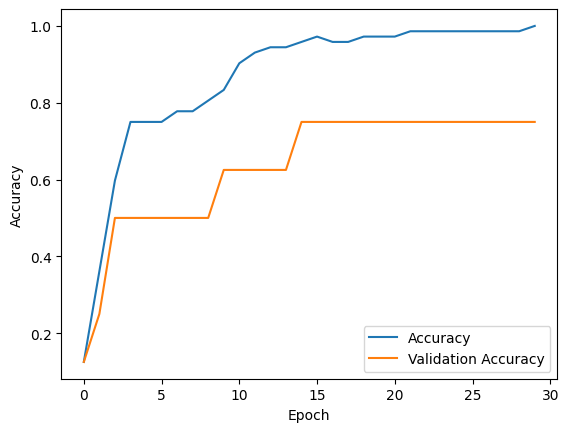

1/1 [==============================] - 0s 172ms/step
[3 1 2 1 1 1 5 3 2 0 4 0 2 0 4 1 2 2 2 0]


In [ ]:
# 6) Testar e validar os resultados
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

# Visualizar a precisão do modelo durante o treinamento
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Mostrar o relatório de classificação
y_pred_probabilities = model.predict(X_test_scaled)
y_pred = y_pred_probabilities.argmax(axis=-1)
print(y_pred)

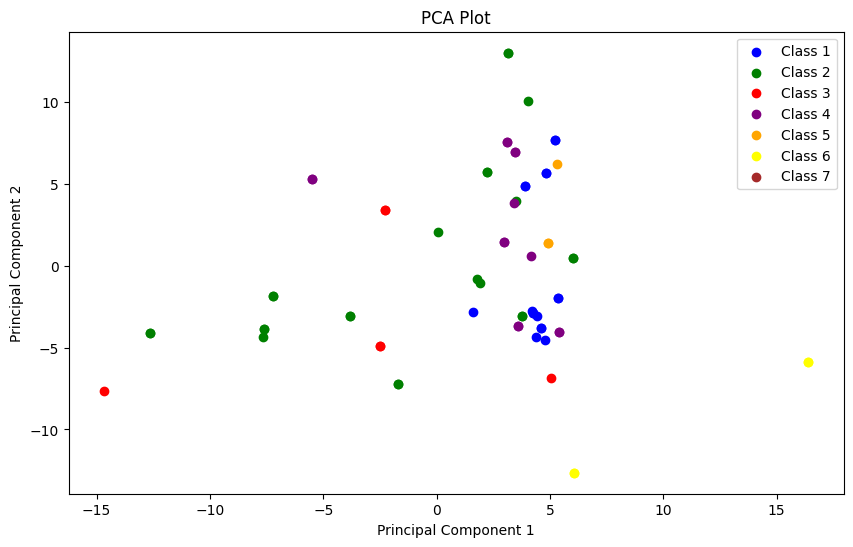

In [ ]:
# Definindo uma lista de cores
colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'brown']

# 7) Avaliar o uso de PCA (Análise de Componentes Principais)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(10, 6))
for idx, cls in enumerate(classes):
    plt.scatter(X_pca[y_train == cls, 0], X_pca[y_train == cls, 1], label=f'Class {cls}', color=colors[idx])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot')
plt.legend()
plt.show()

In [ ]:
# report_df = ProfileReport(data)
# report_df

In [ ]:
# O modelo que implementado apresentou uma acurácia de 0.9500 no conjunto de testes